# Project: Diabetes dataset Analysis
# Name: Diab Saeed 
# Date 1/8/2024

### <span style="color:red"> Objective: My goal from this analysis is to answer some questions Like: 
####                1. The overall distribtion for each feature.
####                2. What is the relationship between different features?
####                3. Which features are significantly different between diabetic and non-diabetic patients?
####                4. The effect of each feature on the outcome
### <span style="color:red"> Dataset description: 
####                The dataset used in this analysis is sourced from the UCI Machine Learning Repository. It contains  data collected from a healthcare study aimed at predicting the onset of diabetes based on diagnostic measurements.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [91]:
df = pd.read_csv("diabetes (1).csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

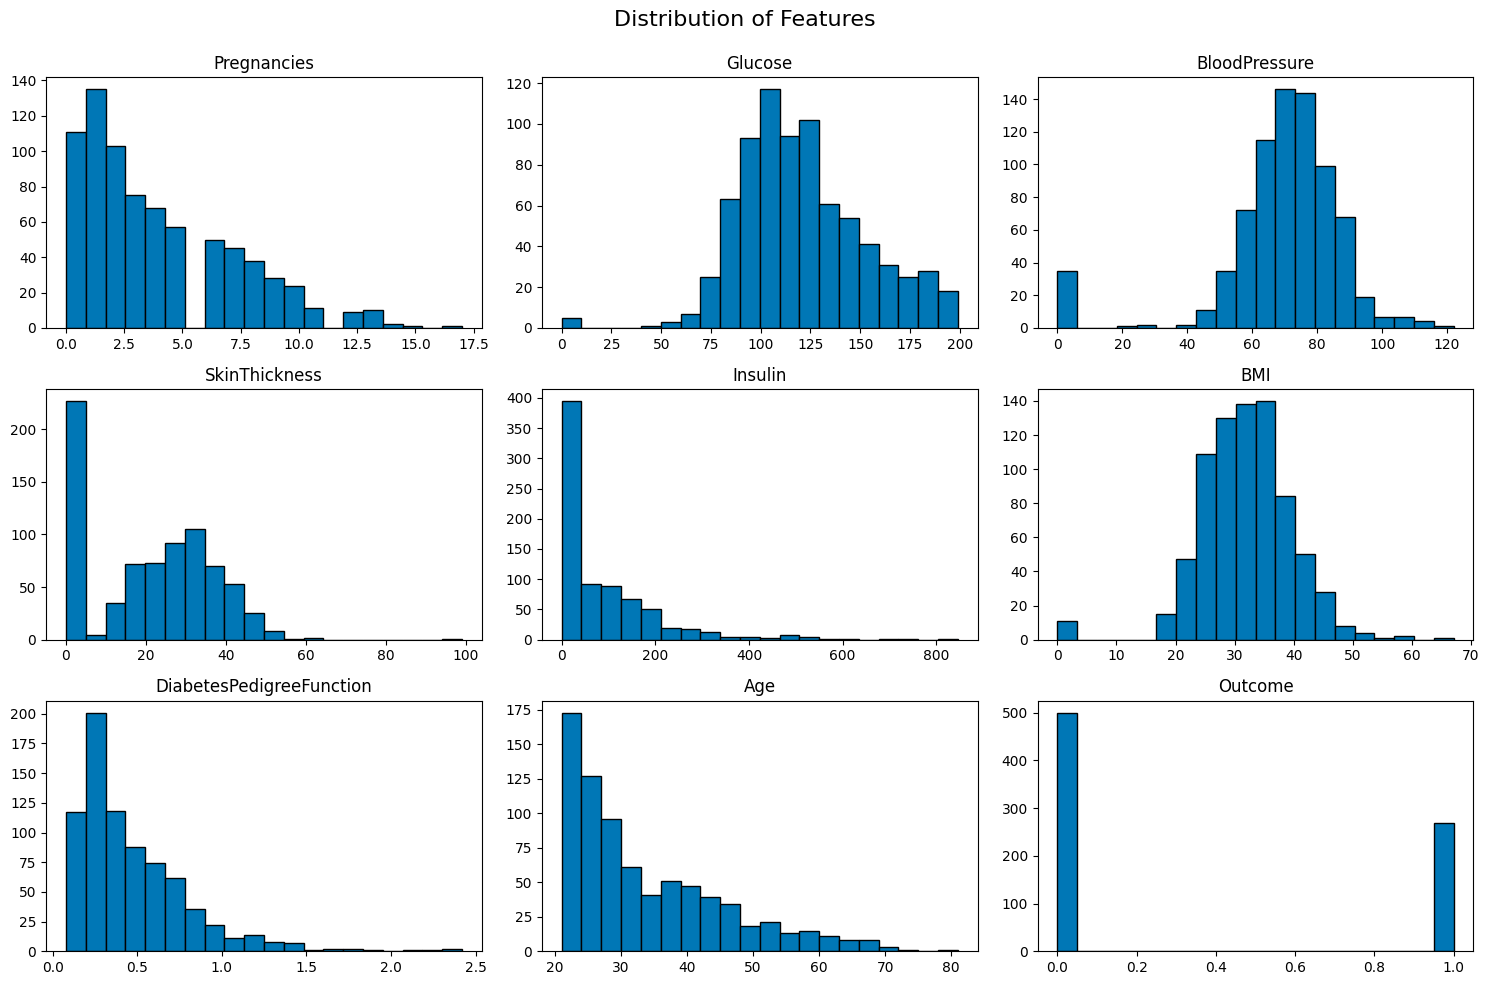

In [19]:
fig,axes = plt.subplots(3,3,figsize=(15,10))
axes = axes.flatten()
columns = df.columns
for ax, col in zip(axes, columns):
    df[col].hist(bins=20, edgecolor='black', ax=ax,grid=False,color='#0077b6')
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

<Axes: >

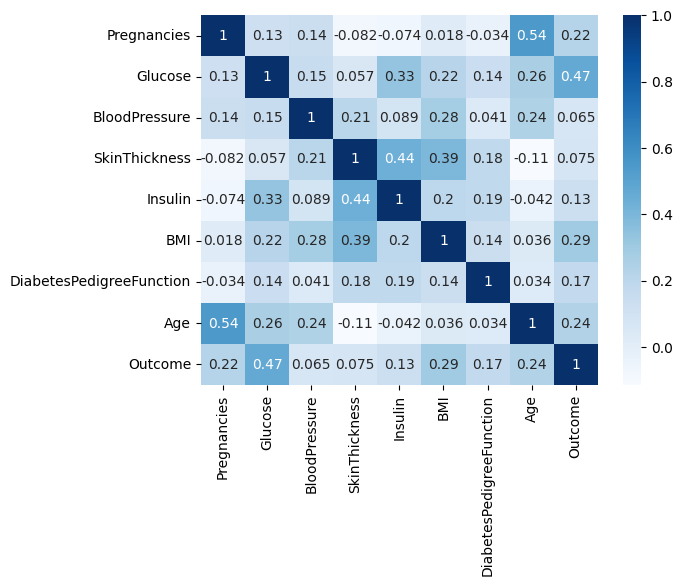

In [92]:
cor = df.corr() 
sns.heatmap(cor,cmap='Blues',annot=True)

<Axes: >

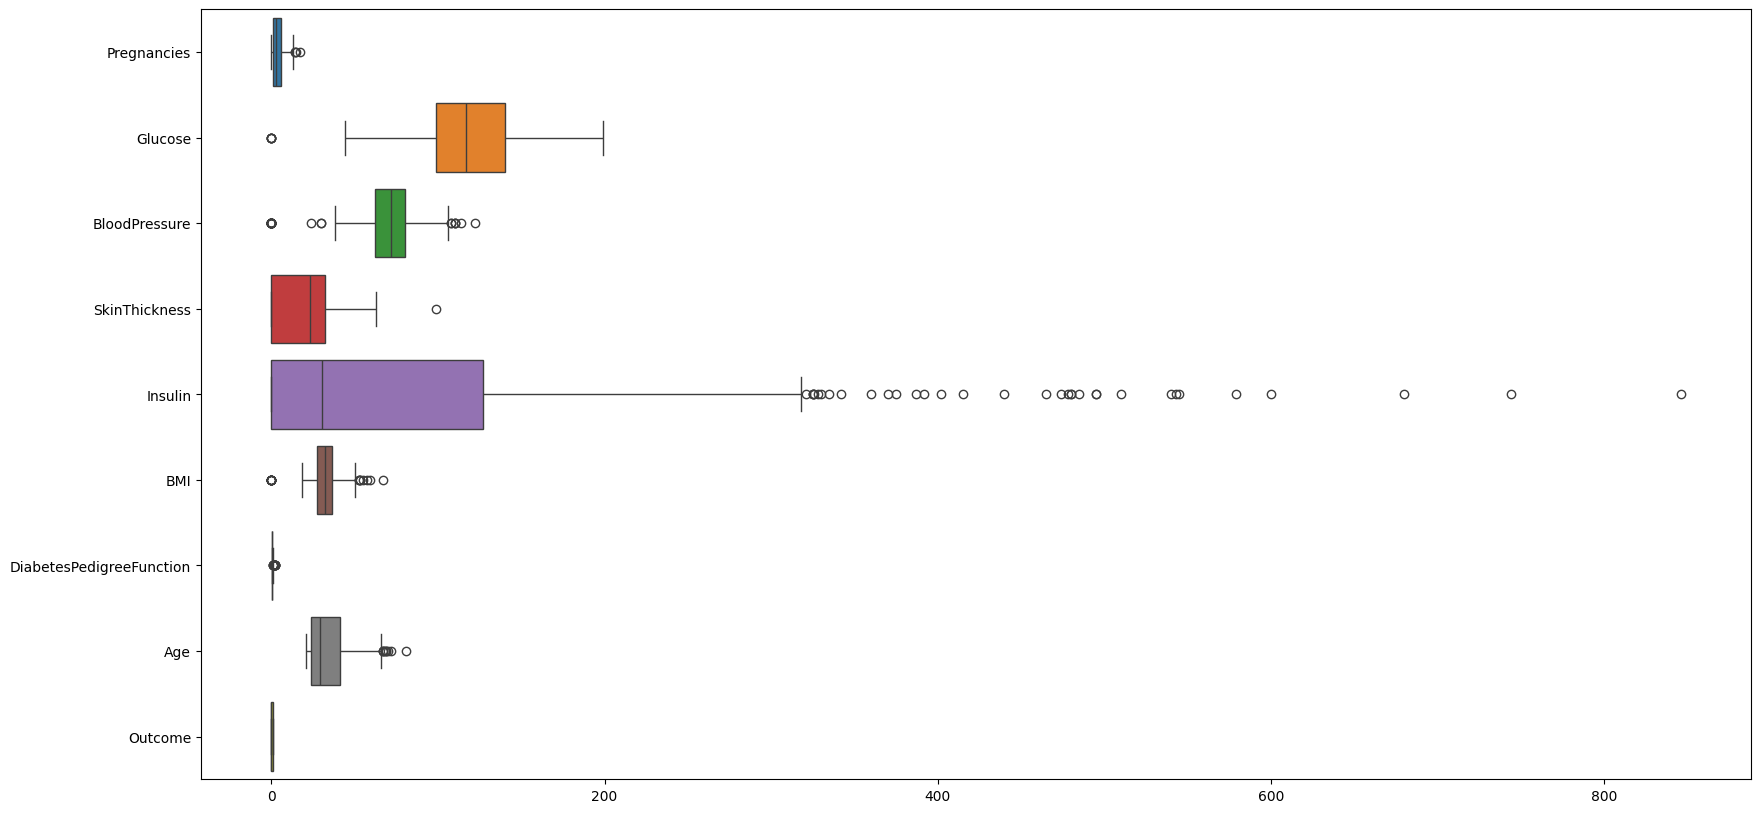

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='h')

### Cleaning Data

#### <span style="color:green"> Null values do not assigned as Nan and from the blood presure column I expected that it would be zero

So there are 35 values assigned as 0 and it's known that is impossiple

We can change it by mean or mode or median

We will use mean here As this data is normally distributed but firstly we should get rid of outliars

In [29]:
df.groupby('BloodPressure').size()

BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
dtype: int64

In [83]:
df.groupby('Glucose').size()

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Length: 136, dtype: int64

In [84]:
df.groupby('SkinThickness').size()

SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
dtype: int64

In [81]:
#Getting the trim mean to get rid of small 15% outliars
data_blood = np.array(df['BloodPressure'])
data_blood = sorted(data_blood.flatten())
n = len(data_blood)
k = int((data_blood.index(60) / len(data_blood)) * n)
trimmed_data = data_blood[k:]
trimed_mean = int(np.mean(trimmed_data))

In [82]:
#replace the zeros by the trimed mean
df['BloodPressure'] = df['BloodPressure'].replace(0,trimed_mean)

In [85]:
#replacing the zeros in Glucose and SkinThickness by median
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [67]:
df.groupby('Age').size()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64

In [86]:
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=10,labels=['21-27','27-33','33-39','39-45','45-51','51-57','57-63','63-69','69-75','+75'], right=False)


In [15]:
age_group_diabetes_freq = df[df['Outcome'] == 1].groupby('AgeGroup').size()
age_group_diabetes_freq.index = age_group_diabetes_freq.index.astype(str)


C:\Users\diabk\AppData\Local\Temp\ipykernel_13828\2950542205.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diabetes_freq = df[df['Outcome'] == 1].groupby('AgeGroup').size()


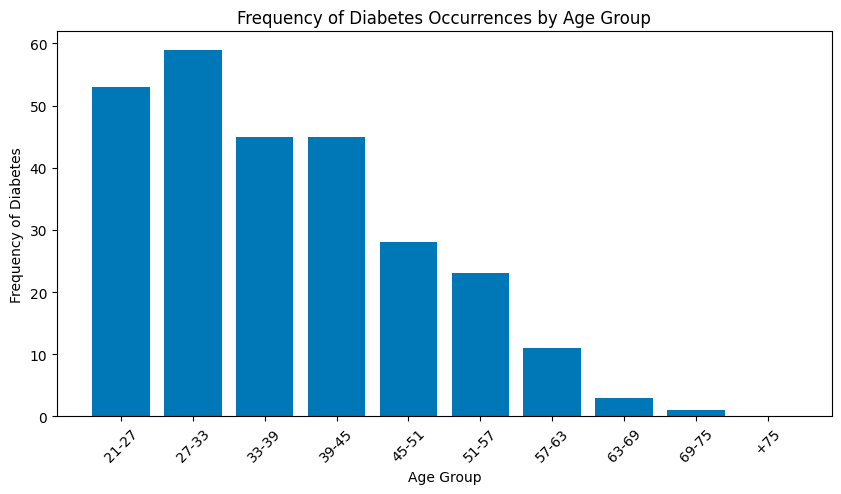

In [18]:
plt.figure(figsize=(10,5))
plt.bar(age_group_diabetes_freq.index, age_group_diabetes_freq.values, color='#0077b6')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Diabetes')
plt.title('Frequency of Diabetes Occurrences by Age Group')
plt.xticks(rotation=45)
plt.show()

#### The most suceptable Age of diabetes is the range between 27-33

C:\Users\diabk\AppData\Local\Temp\ipykernel_13828\849073740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic['DiabetesPedigreeFunction_1'] = pd.cut(df['DiabetesPedigreeFunction'], bins=10, right=False)
C:\Users\diabk\AppData\Local\Temp\ipykernel_13828\849073740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DPF_group_diabetes_freq = diabetic.groupby('DiabetesPedigreeFunction_1').size()


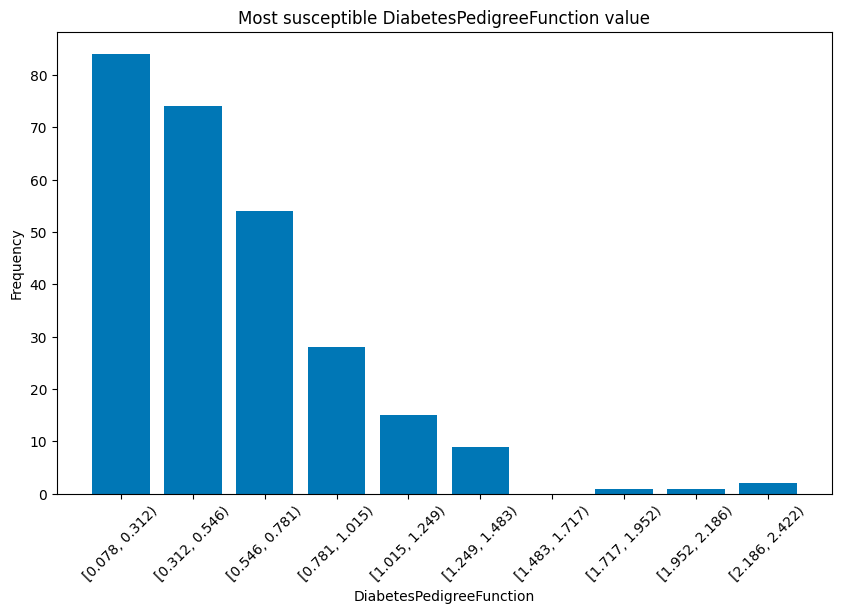

In [87]:
diabetic['DiabetesPedigreeFunction_1'] = pd.cut(df['DiabetesPedigreeFunction'], bins=10, right=False)
DPF_group_diabetes_freq = diabetic.groupby('DiabetesPedigreeFunction_1').size()
DPF_group_diabetes_freq.index = DPF_group_diabetes_freq.index.astype(str)
plt.figure(figsize=(10, 6))
plt.bar(DPF_group_diabetes_freq.index, DPF_group_diabetes_freq.values, color='#0077b6',)
plt.title("Most susceptible DiabetesPedigreeFunction value")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.xticks(rotation=45) 
plt.show()

#### The most suceptable DiabetesPedigreeFunction is the smallest and this show the relaionship between the DiabetesPedigreeFunction and the outcome

#### <span style="color:green">Comparing the diabetic and non-diabetic features

<Figure size 1000x500 with 0 Axes>

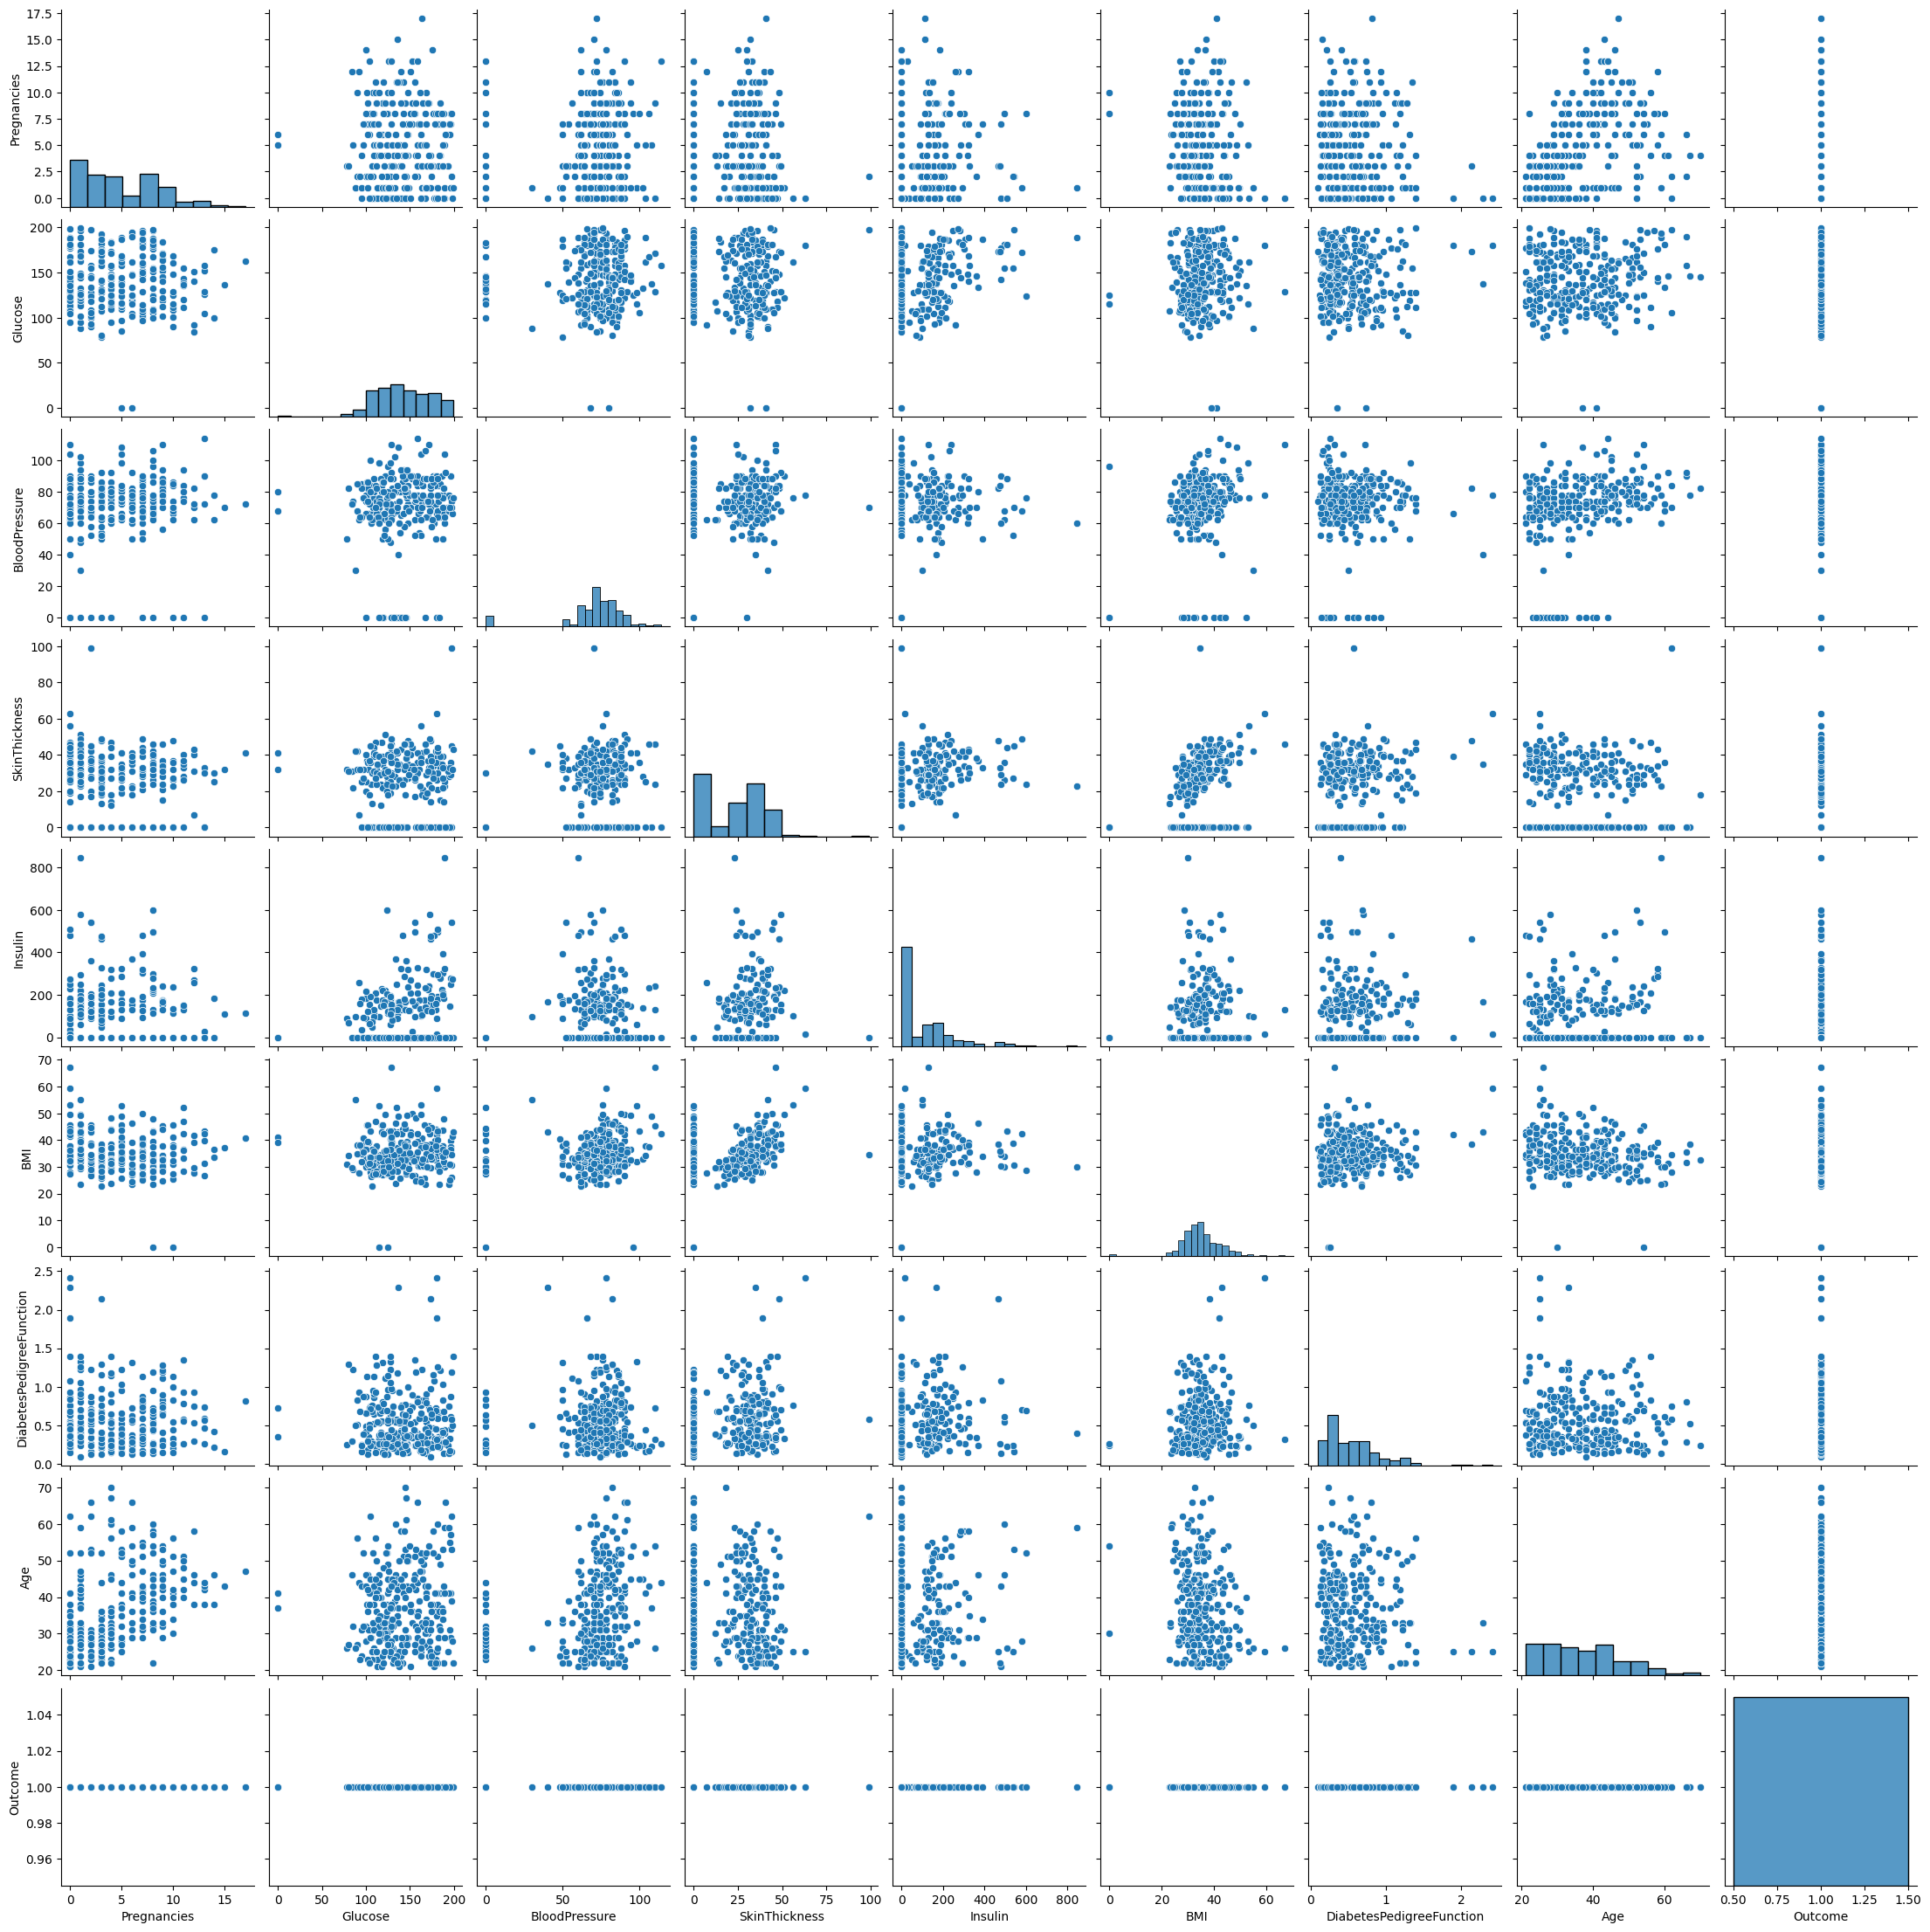

In [80]:
plt.figure(figsize=(10,5))
sns.pairplot(diabetic)
plt.show()


<Figure size 1000x500 with 0 Axes>

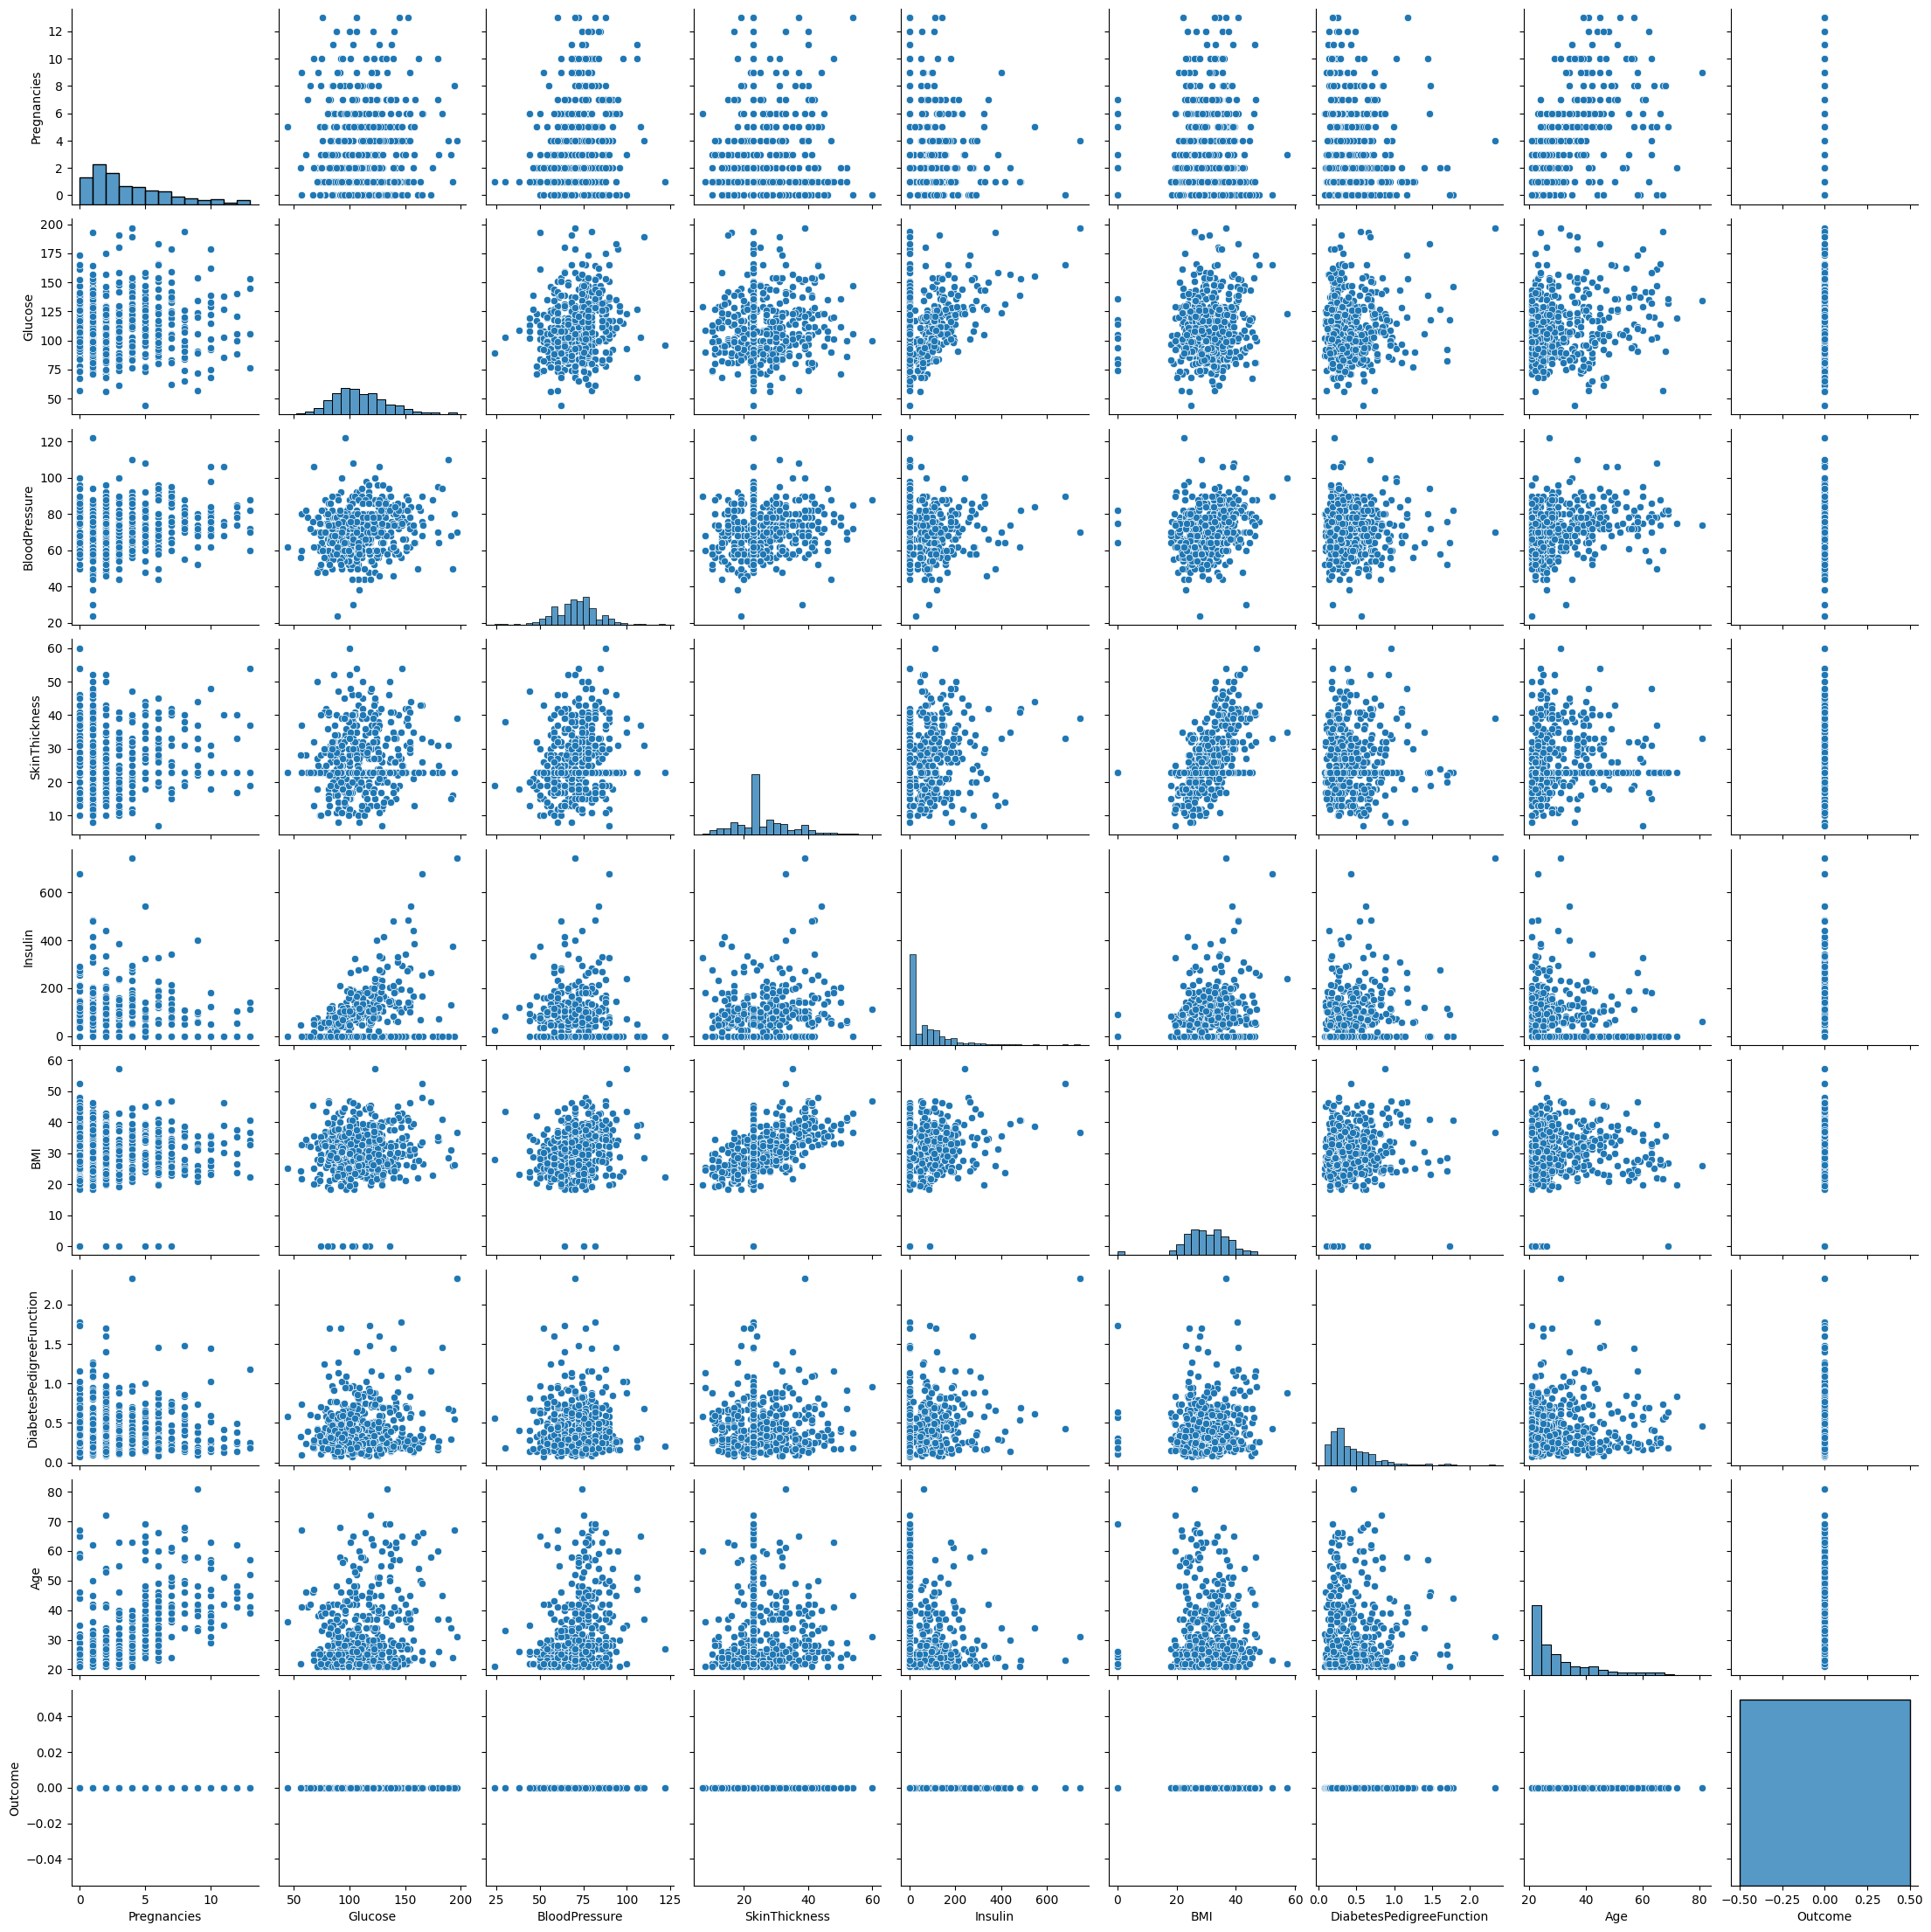

In [88]:
plt.figure(figsize=(10,5))
sns.pairplot(non_diabetic)
plt.show()


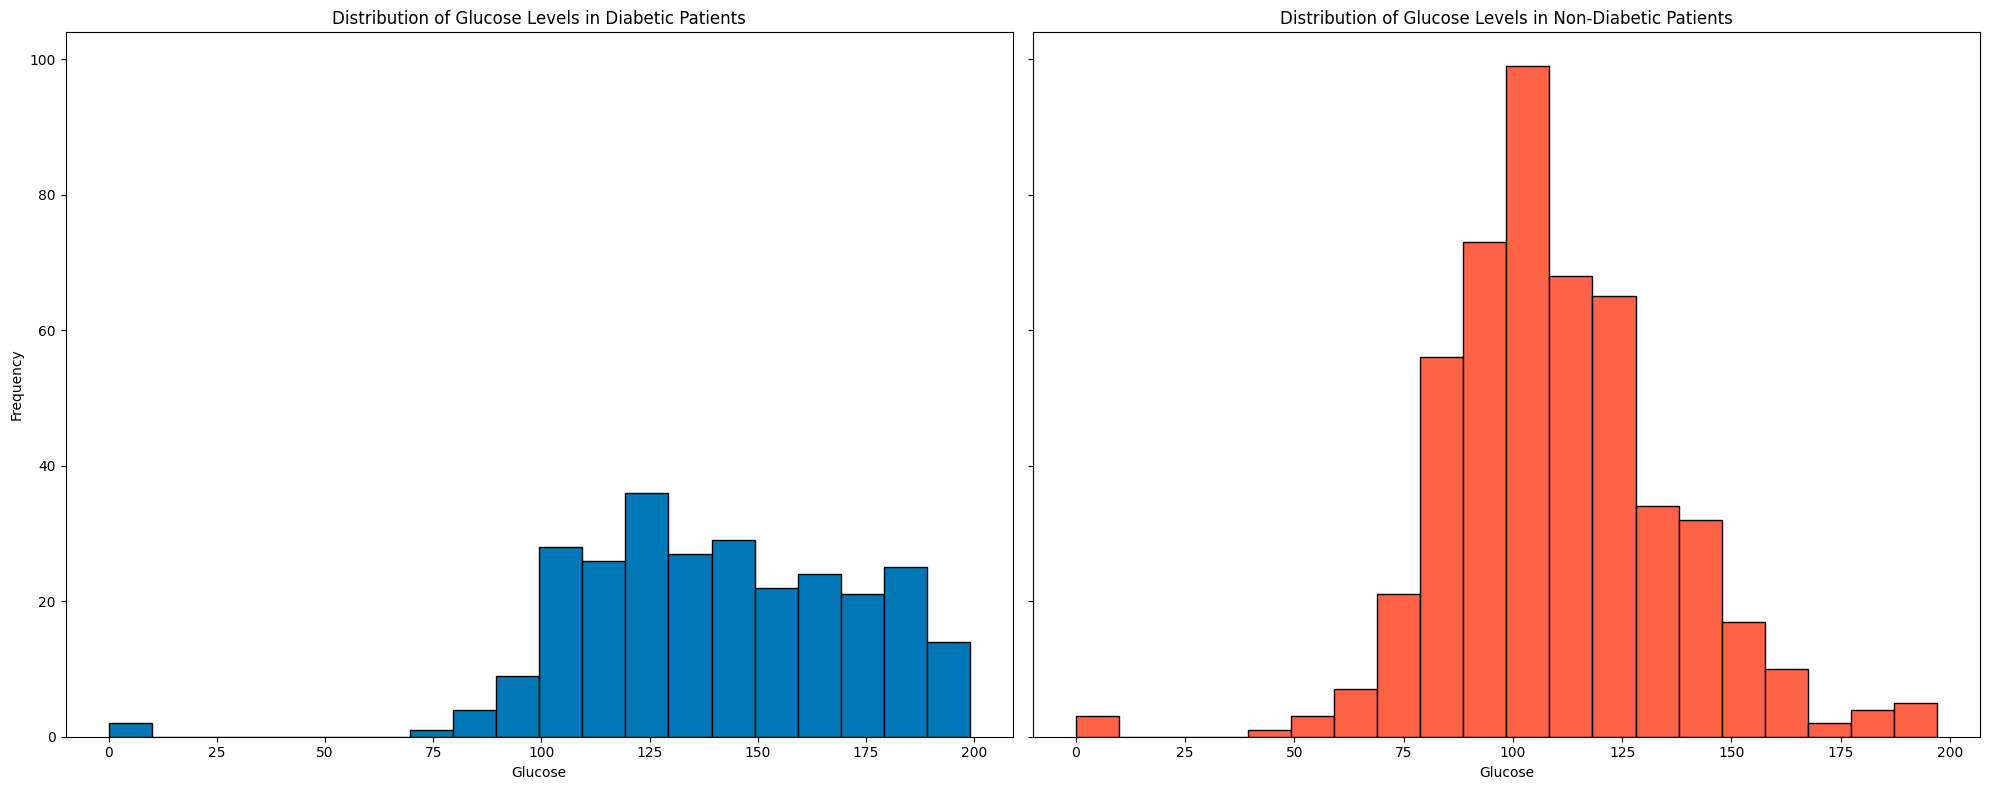

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
axes[0].hist(diabetic['Glucose'], bins=20, color='#0077b6', edgecolor='black')
axes[0].set_title('Distribution of Glucose Levels in Diabetic Patients')
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Frequency')
axes[1].hist(non_diabetic['Glucose'], bins=20, color='#ff6347', edgecolor='black')
axes[1].set_title('Distribution of Glucose Levels in Non-Diabetic Patients')
axes[1].set_xlabel('Glucose')
plt.tight_layout()
plt.show()

#### The relationship between skinThickness and Glucose level 

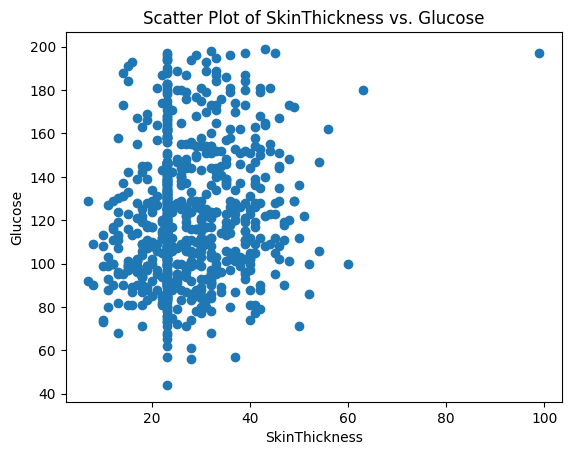

In [89]:
plt.scatter(data=df,x="SkinThickness",y="Glucose")
plt.title('Scatter Plot of SkinThickness vs. Glucose')
plt.xlabel('SkinThickness')
plt.ylabel('Glucose')
plt.show()

# Summary

### - It was clear that there are many relationships between different dataset features.
### - And I found that the most suceptable age is the range between 27 and 33.
### - And the smaller the Diabetes Pedigree Function, the more suceptable the person to the diabetes.
### - There is a weak positive relationship between the skin thickness and Glucose level
### - There is a weak positive relationship between the skin thickness and Insuline
### - There is a positive relationship beteen BMI and the diabetes.